In [15]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/thinkstats.py")

In [16]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/relay.py")
download(
    "https://github.com/AllenDowney/ThinkStats/raw/v3/data/Apr25_27thAn_set1.shtml"
)

In [17]:
from relay import read_results

results = read_results()
results.head()

,Place,Div/Tot,Division,Guntime,Nettime,Min/Mile,MPH
0,1,1/362,M2039,30:43,30:42,4:57,12.121212
1,2,2/362,M2039,31:36,31:36,5:06,11.764706
2,3,3/362,M2039,31:42,31:42,5:07,11.726384
3,4,4/362,M2039,32:28,32:27,5:14,11.464968
4,5,5/362,M2039,32:52,32:52,5:18,11.320755


### Exercise 4.1
How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. And if no one knows, you can use my birth weight, 8.5 pounds, for this exercise.

Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [18]:
from nsfg import get_nsfg_groups

live, firsts, others = get_nsfg_groups()

In [19]:
def percentile_rank(x, seq):
    """Percentile rank of x.

    x: value
    seq: sequence of values

    returns: percentile rank 0-100
    """
    return (seq <= x).mean() * 100

In [20]:
percentile_rank(4, live.totalwgt_lb.dropna() * 0.453592)

89.47776056649701

In [21]:
percentile_rank(4, firsts.totalwgt_lb.dropna() * 0.453592)

90.74031629612652

In [6]:
from empiricaldist import Cdf

In [23]:
Cdf.from_seq(live.totalwgt_lb.dropna() * 0.453592)

,probs
0.056699,0.000111
0.141747,0.000221
0.198446,0.000332
0.255146,0.000443
0.283495,0.000664
...,...
5.896696,0.999336
6.123492,0.999447
6.236890,0.999557
6.350288,0.999889


Exercise 4.2
For live births in the NSFG dataset, the column babysex indicates whether the baby was male or female. We can use query to select the rows for male and female babies.

Make Cdf objects that represent the distribution of birth weights for male and female babies. Plot the two CDFs. What are the differences in the shape and location of the distributions?

If a male baby weighs 8.5 pounds, what is his percentile rank? What is the weight of a female baby with the same percentile rank?

In [24]:
male = live.query("babysex == 1")
female = live.query("babysex == 2")
len(male), len(female)

(4641, 4500)

In [30]:
gender_cdf = Cdf.from_seq(live.babysex)
gender_cdf

,probs
1.0,0.507713
2.0,1.000000


In [32]:
male_weight_cdf = Cdf.from_seq(male.totalwgt_lb)
female_weight_cdf = Cdf.from_seq(female.totalwgt_lb)

In [35]:
import matplotlib.pyplot as plt

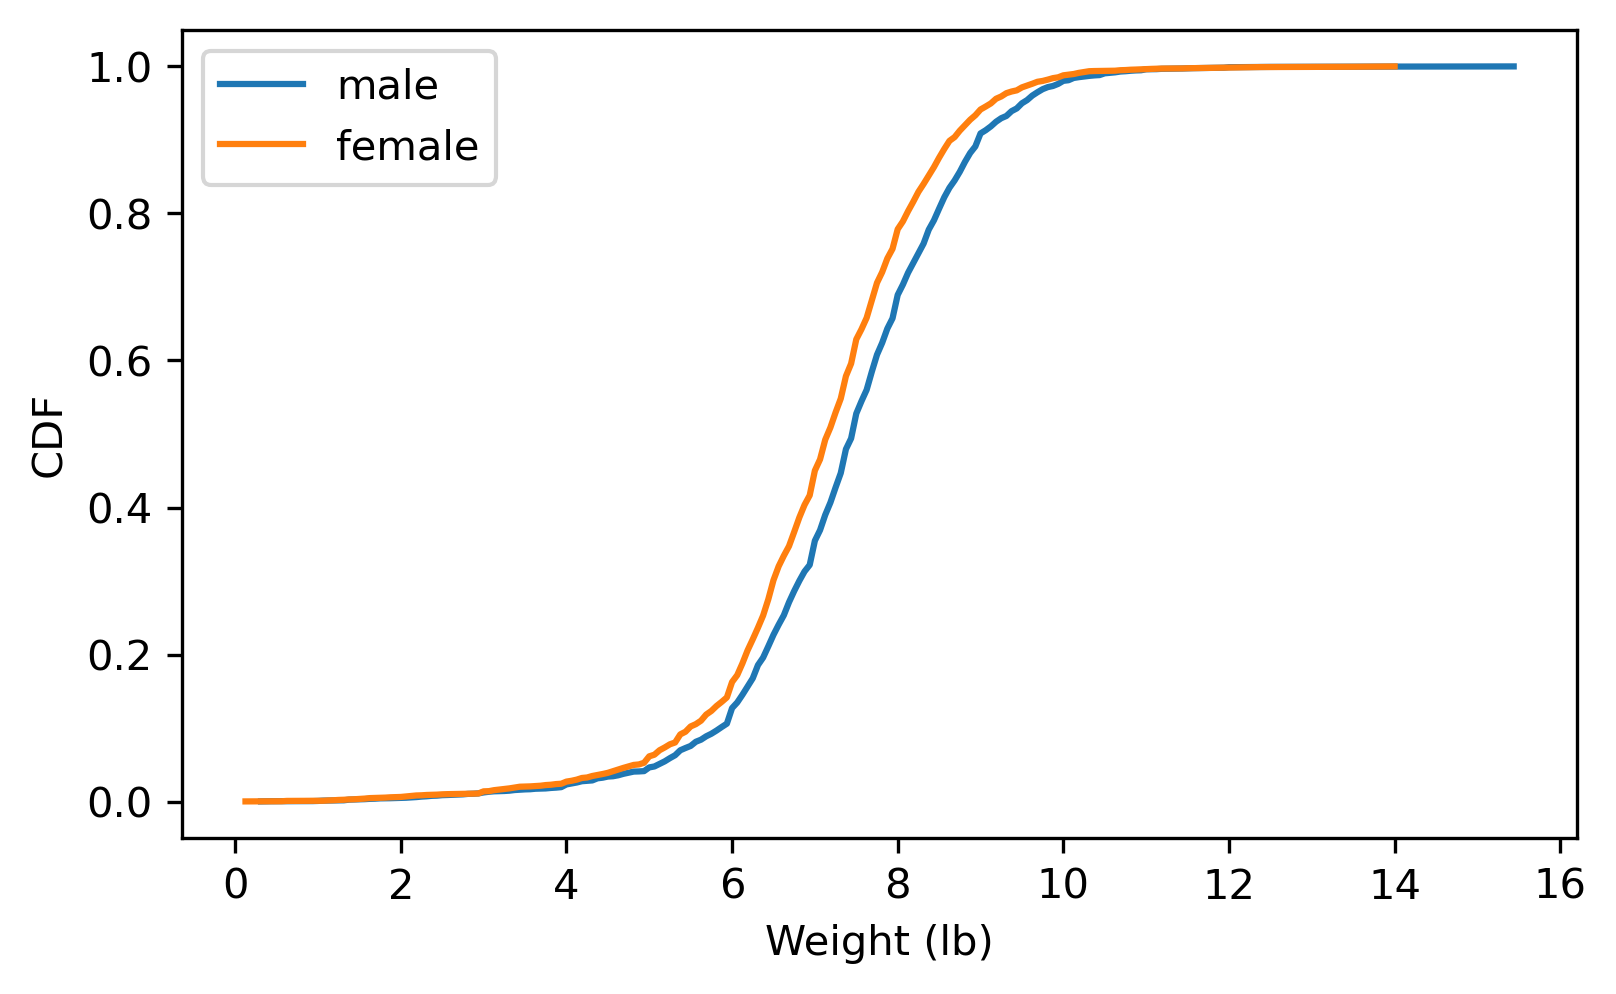

In [37]:
male_weight_cdf.plot(label="male")
female_weight_cdf.plot(label="female")

plt.xlabel("Weight (lb)")
plt.ylabel("CDF")
plt.legend()

In [38]:
percentile_rank(8.5, male.totalwgt_lb)

79.68110321051498

### Exercise 4.3
From the NSFG dataset pregnancy data, select the agepreg column and make a Cdf to represent the distribution of age at conception for each pregnancy. Use the CDF to compute the percentage of ages less than or equal to 20, and the percentage less than or equal to 30. Use those results to compute the percentage between 20 and 30.

In [39]:
from nsfg import read_fem_preg

preg = read_fem_preg()

In [41]:
agepreg_cdf = Cdf.from_seq(preg.agepreg)

In [47]:
# Percentage of ages less than or equal to 20
less_20 = agepreg_cdf[agepreg_cdf.index <= 20].tail(1)
less_20

20.0    0.247187
Name: , dtype: float64

In [48]:
# Percentage of ages less than or equal to 30
less_30 = agepreg_cdf[agepreg_cdf.index <= 30].tail(1)
less_30

30.0    0.804622
Name: , dtype: float64

In [ ]:
# Percentagge between 20 and 30
less_30.values - less_20.values

array([0.55743524])

### Exercise 4.4
Here are the running speeds of the people who finished the James Joyce Ramble, described earlier in this chapter.
Make a Cdf that represents the distribution of these speeds, and use it to compute the median, IQR, and quartile skewness. Does the distribution skew to the left or right?

In [52]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/relay.py")
download(
    "https://github.com/AllenDowney/ThinkStats/raw/v3/data/Apr25_27thAn_set1.shtml"
)

In [53]:
from relay import read_results

results = read_results()
results.head()

,Place,Div/Tot,Division,Guntime,Nettime,Min/Mile,MPH
0,1,1/362,M2039,30:43,30:42,4:57,12.121212
1,2,2/362,M2039,31:36,31:36,5:06,11.764706
2,3,3/362,M2039,31:42,31:42,5:07,11.726384
3,4,4/362,M2039,32:28,32:27,5:14,11.464968
4,5,5/362,M2039,32:52,32:52,5:18,11.320755


In [54]:
speeds = results["MPH"].values

In [55]:
speeds_cdf = Cdf.from_seq(speeds)

In [56]:
speeds_cdf

,probs
3.061224,0.000612
3.225806,0.001225
3.278689,0.002449
3.383459,0.003062
4.031355,0.003674
...,...
11.320755,0.997551
11.464968,0.998163
11.726384,0.998775
11.764706,0.999388


In [57]:
def median(cdf):
    m = cdf.inverse(0.5)
    return m

In [58]:
def iqr(cdf):
    low, high = cdf.inverse([0.25, 0.75])
    return high - low

In [59]:
def quartile_skewness(cdf):
    low, median, high = cdf.inverse([0.25, 0.5, 0.75])
    midpoint = (high + low) / 2
    semi_iqr = (high - low) / 2
    return (midpoint - median) / semi_iqr

In [60]:
median(speeds_cdf)

array(6.70391061)

In [61]:
iqr(speeds_cdf)

1.4865637507146943

In [62]:
quartile_skewness(speeds_cdf)

0.13450795015040942

Text(0, 0.5, 'CDF')

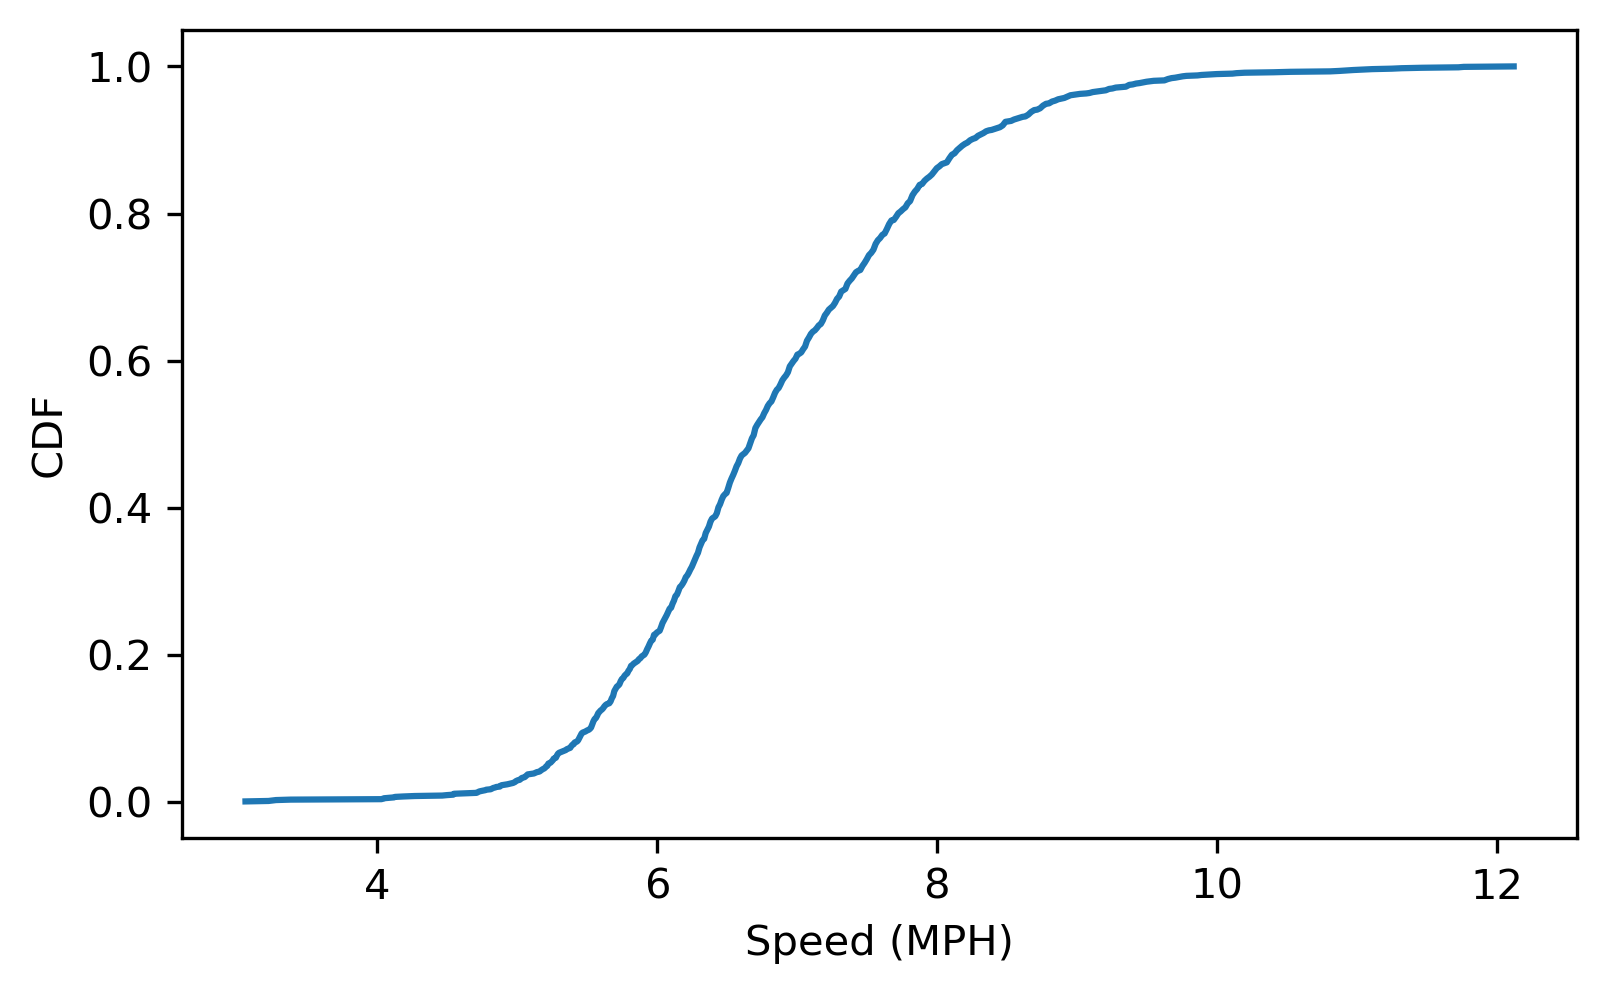

In [64]:
speeds_cdf.plot()
plt.xlabel("Speed (MPH)")
plt.ylabel("CDF")

## Exercise 4.5
The numbers generated by np.random.random are supposed to be uniform between 0 and 1, which means that the CDF of a sample should be a straight line. Let’s see if that’s true. Here’s a sample of 1001 numbers. Plot the CDF of this sample. Does it look like a straight line?

In [66]:
import numpy as np
t = np.random.random(1001)

Text(0, 0.5, 'CDF')

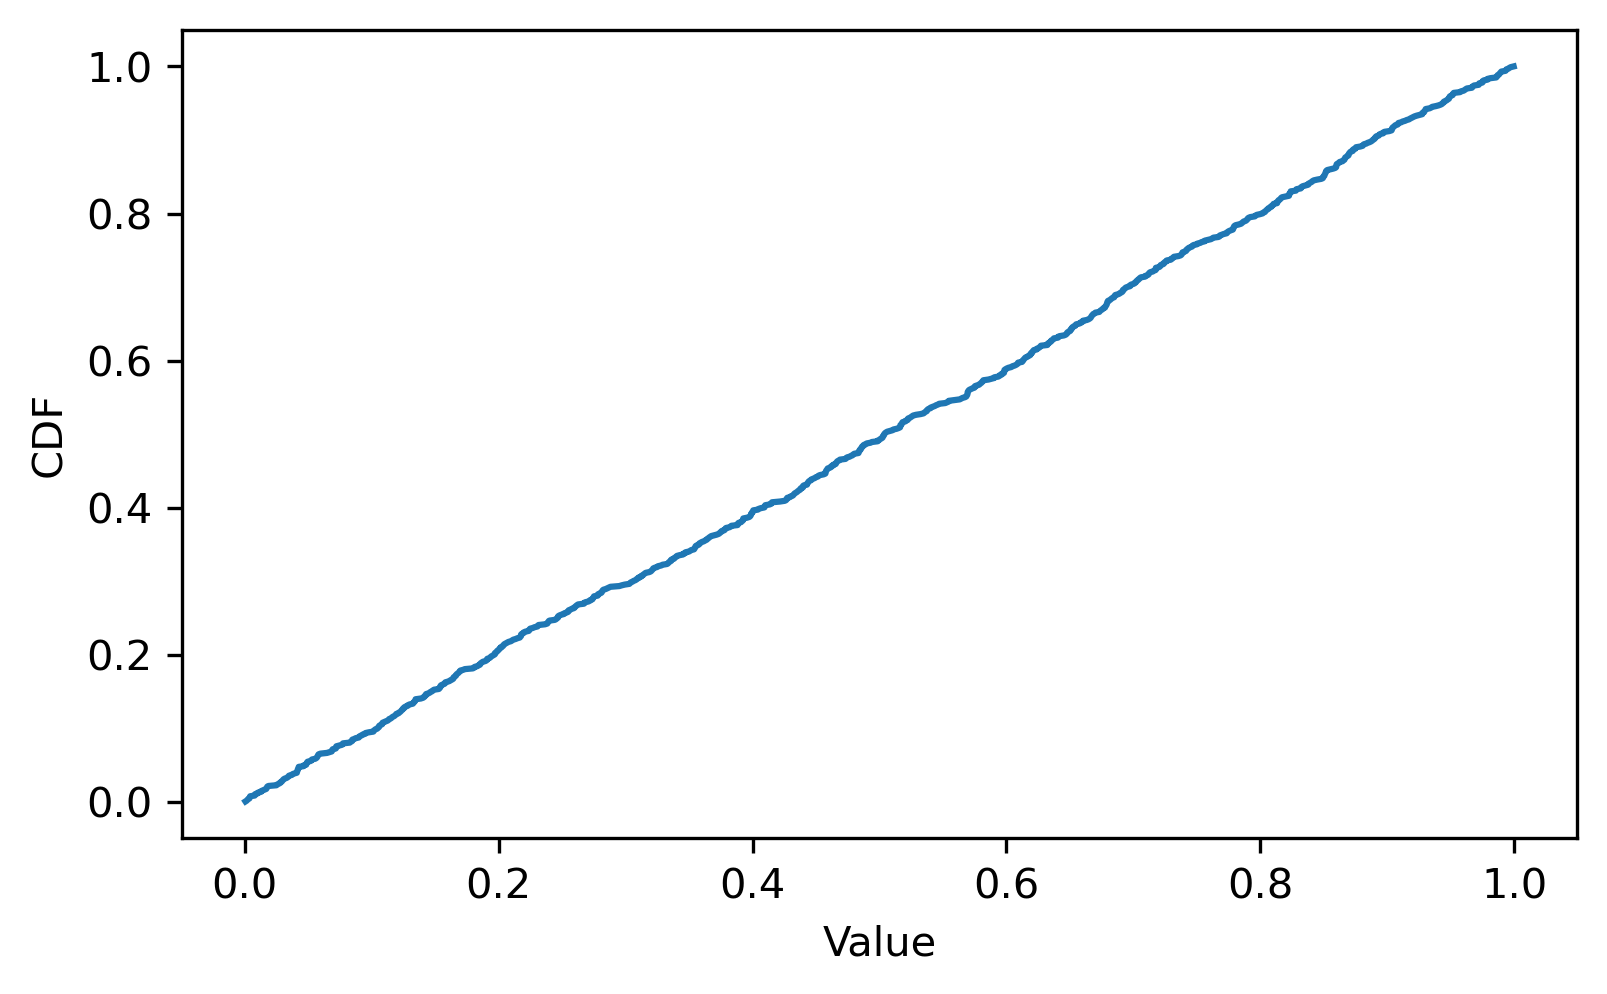

In [68]:
random_cdf = Cdf.from_seq(t)
random_cdf.plot()
plt.xlabel("Value")
plt.ylabel("CDF")